In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Introduction_to_Deep_Learning_with_PyTorch/datasets/'

In [3]:
import torch
import torch.nn as nn

In [4]:
# exercise 01

"""
Implementing ReLU

The rectified linear unit (or ReLU) function is one of the most common activation functions in deep learning.

It overcomes the training problems linked with the sigmoid function you learned, such as the vanishing gradients problem.

In this exercise, you'll begin with a ReLU implementation in PyTorch. Next, you'll calculate the gradients of the function.

The nn module has already been imported for you.
"""

# Instructions

"""

    Create a ReLU function in PyTorch.
---

    Calculate the gradient of the ReLU function for x using the relu_pytorch() function you defined, then running a backward pass
    Find the gradient at x.

"""

# solution

# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)
y.backward()

# Print the gradient of the ReLU function for x
gradient = y.item()
print(gradient)

#----------------------------------#

# Conclusion

"""
Nicely done! Notice that the input value was zero, and the ReLU function turns any negative input to zero. Recall from the graph in the video that for negative values of x, the output of ReLU is always zero, and indeed the gradient is zero everywhere because there is no change in the function with respect to any negative value of x.
"""

0.0


'\nNicely done! Notice that the input value was zero, and the ReLU function turns any negative input to zero. Recall from the graph in the video that for negative values of x, the output of ReLU is always zero, and indeed the gradient is zero everywhere because there is no change in the function with respect to any negative value of x.\n'

In [5]:
# exercise 02

"""
Implementing leaky ReLU

You've learned that ReLU is one of the most used activation functions in deep learning. You will find it in modern architecture. However, it does have the inconvenience of outputting null values for negative inputs and therefore, having null gradients. Once an element of the input is negative, it will be set to zero for the rest of the training. Leaky ReLU overcomes this challenge by using a multiplying factor for negative inputs.

In this exercise, you will implement the leaky ReLU function in NumPy and PyTorch and practice using it. The numpy as np package, the torch package as well as the torch.nn as nn have already been imported.
"""

# Instructions

"""

    Create a leaky ReLU function in PyTorch with a negative slope of 0.05.
    Call the function on the tensor x, which has already been defined for you.
---
Question

For a negative slope of 0.05 and an input value of -3, what is the output of the leaky ReLU function?
(-0.15)
"""

# solution

# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope = 0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

#----------------------------------#

# Conclusion

"""
That's correct! Leaky ReLU is another very popular activation function found in modern architecture. By never setting the gradients to zero, it allows every parameter of the model to keep learning.
"""

tensor(-0.1000)


"\nThat's correct! Leaky ReLU is another very popular activation function found in modern architecture. By never setting the gradients to zero, it allows every parameter of the model to keep learning.\n"

In [7]:
# exercise 03

"""
Counting the number of parameters

Deep learning models are famous for having a lot of parameters. Recent language models have billions of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has.

In this exercise, you will calculate the number of parameters in your model, first using PyTorch then manually.

The torch.nn package has been imported as nn.
"""

# Instructions

"""

    Iterate through the model's parameters to update the total variable with the total number of parameters in the model.
---
Question

Calculate manually the number of parameters of the model below. How many does it have?
(81)
"""

# solution

model = nn.Sequential(nn.Linear(16, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))

total = 0

# Calculate the number of parameters in the model
for parameter in model.parameters():
  total += parameter.numel()

print(total)
#----------------------------------#

# Conclusion

"""
This is correct! The number of parameters is a useful metric to compare the capacity of different architectures.
"""

81


'\nThis is correct! The number of parameters is a useful metric to compare the capacity of different architectures.\n'

In [8]:
def calculate_capacity(model):
  total = 0
  for p in model.parameters():
    total += p.numel()
  return total

In [9]:
# exercise 04

"""
Manipulating the capacity of a network

In this exercise, you will practice creating neural networks with different capacities. The capacity of a network reflects the number of parameters in said network. To help you, a calculate_capacity() function has been implemented, as follows:

def calculate_capacity(model):
  total = 0
  for p in model.parameters():
    total += p.numel()
  return total

This function returns the number of parameters in the your model.

The dataset you are training this network on has n_features features and n_classes classes. The torch.nn package has been imported as nn.
"""

# Instructions

"""
Create a neural network with exactly three linear layers and less than 120 parameters, which takes n_features as inputs and outputs n_classes.
---
Create a neural network with exactly four linear layers and more than 120 parameters, which takes n_features as inputs and outputs n_classes.
"""

# solution

n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with less than 120 parameters
model = nn.Sequential(
    nn.Linear(n_features, 4),
    nn.Linear(4,2),
    nn.Linear(2,n_classes)
)
output = model(input_tensor)

print(calculate_capacity(model))

#----------------------------------#

n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with more than 120 parameters
model = nn.Sequential(
    nn.Linear(n_features, 8),
    nn.Linear(8,4),
    nn.Linear(4,2),
    nn.Linear(2,n_classes)
)

output = model(input_tensor)

print(calculate_capacity(model))

#----------------------------------#

# Conclusion

"""
Nice work! Changing the number of layers and the number of neurons per layer is a great way to quickly iterate on your model and experiment.
"""

52
124


'\nNice work! Changing the number of layers and the number of neurons per layer is a great way to quickly iterate on your model and experiment.\n'

In [13]:
def function(x):
    return x**4 + x**3 - 5*x**2

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def optimize_and_plot(lr=0.01, momentum=0.0):
  x = torch.tensor(2.0, requires_grad=True)
  buffer = torch.zeros_like(x.data)
  values = []
  for i in range(10):

      y = function(x)
      values.append((x.clone(), y.clone()))
      y.backward()

      d_p = x.grad.data
      if momentum !=0 :
          buffer.mul_(momentum).add_(d_p)
          d_p = buffer

      x.data.add_(d_p, alpha=-lr)
      x.grad.zero_()
      
  x = np.arange(-3, 2, 0.001)
  y = function(x)

  plt.figure(figsize=(10, 5))
  plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', 
           linewidth=2, markersize=7)
  for i in range(10):
      plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'})
  plt.plot(x, y, linewidth=2)
  plt.grid()
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.legend(['Optimizer steps', 'Square function'])
  plt.show()

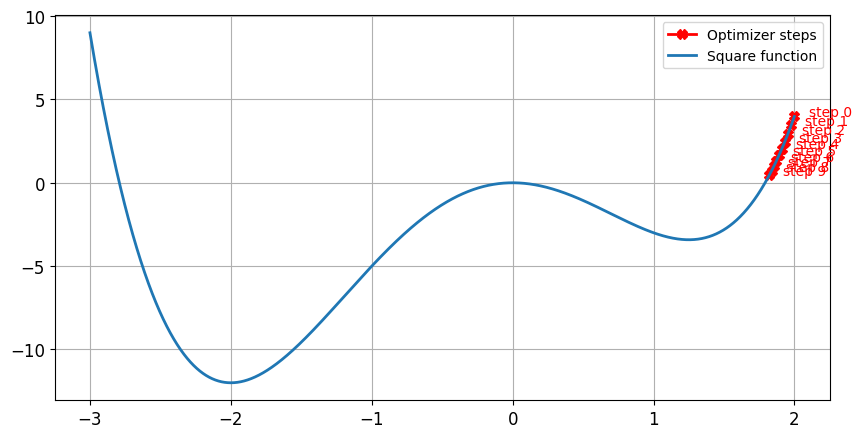

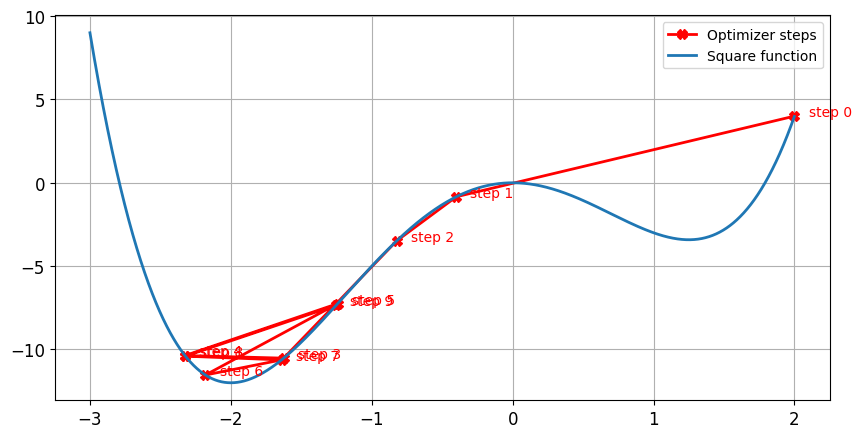

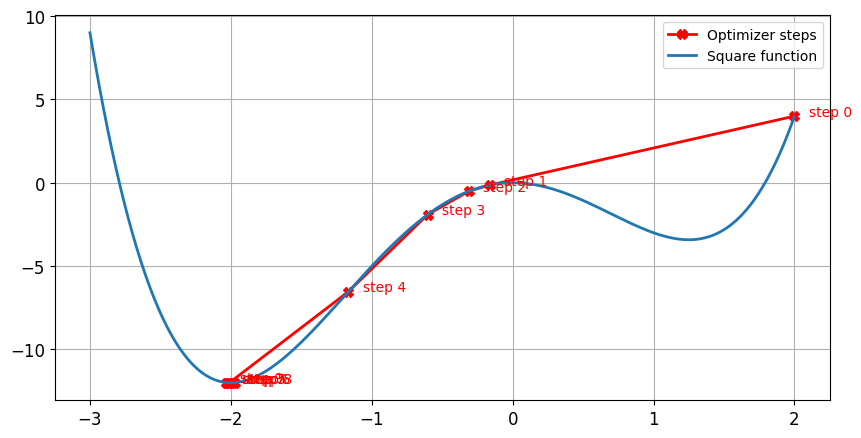

'\nNicely done! A learning rate around 0.09 gets you closest to the global minimum.\n'

In [16]:
# exercise 05

"""
Experimenting with learning rate

In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function X⁴+X³-5X² 
in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.
"""

# Instructions

"""

    Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.
    ---
    Try a large learning rate value such that the optimizer skips past the global minimum at -2.
    ---
    Based on the previous results, try a better learning rate value.

"""

# solution

# Try a first learning rate value
lr0 = 0.001
optimize_and_plot(lr=lr0)

#----------------------------------#

# Try a second learning rate value
lr1 = 0.1
optimize_and_plot(lr=lr1)

#----------------------------------#

# Try a third learning rate value
lr2 = 0.09
optimize_and_plot(lr=lr2)

#----------------------------------#

# Conclusion

"""
Nicely done! A learning rate around 0.09 gets you closest to the global minimum.
"""

In [17]:
def optimize_and_plot(lr=0.01, momentum=0.0):
  x = torch.tensor(2.0, requires_grad=True)
  buffer = torch.zeros_like(x.data)
  values = []
  for i in range(20):

      y = function(x)
      values.append((x.clone(), y.clone()))
      y.backward()

      d_p = x.grad.data
      if momentum !=0 :
          buffer.mul_(momentum).add_(d_p)
          d_p = buffer

      x.data.add_(d_p, alpha=-lr)
      x.grad.zero_()
      
  x = np.arange(-3, 2, 0.001)
  y = function(x)

  plt.figure(figsize=(10, 5))
  plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', 
           linewidth=2, markersize=7)
  for i in range(10):
      plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'})
  plt.plot(x, y, linewidth=2)
  plt.grid()
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.legend(['Optimizer steps', 'Square function'])
  plt.show()

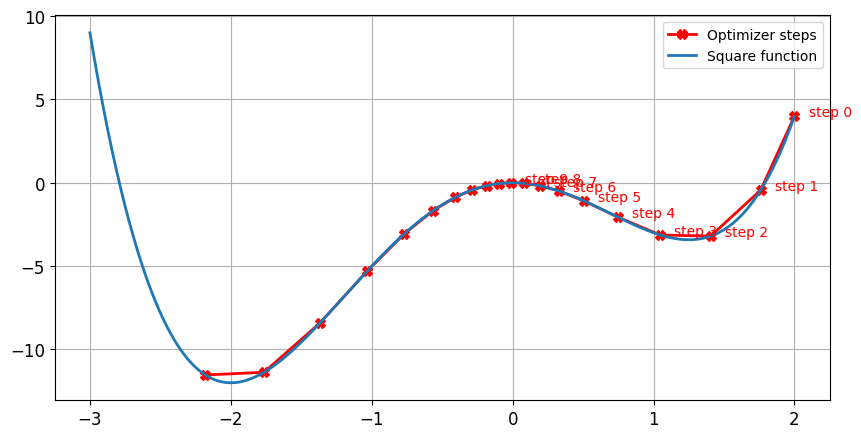

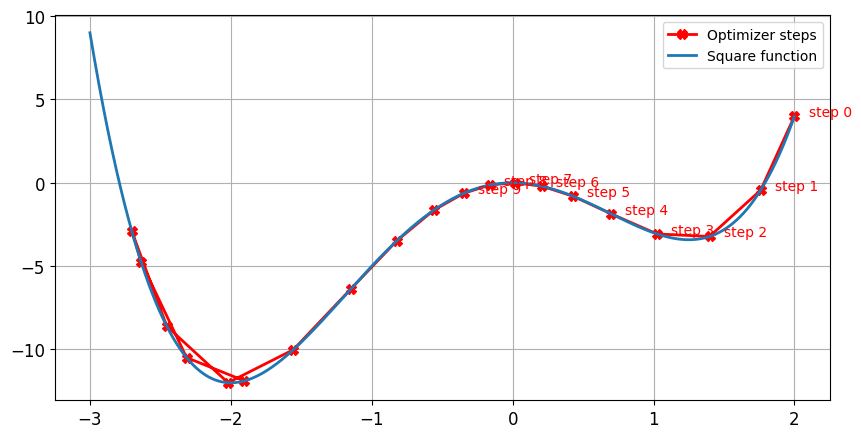

'\nMomentum and learning rate are critical to the training of your neural network. A good rule of thumb is to start with a learning rate of 0.001 and a momentum of 0.95.\n'

In [18]:
# exercise 06

"""
Experimenting with momentum

In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function

in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 20 steps of the SGD optimizer and display the results.
"""

# Instructions

"""

    Try a first value for the momentum such that the optimizer gets stuck in the first minimum.
---
    Try a second value for the momentum such that the optimizer finds the global optimum.

"""

# solution

# Try a first value for momentum
mom0 = 0.92
optimize_and_plot(momentum=mom0)

#----------------------------------#

# Try a second value for momentum
mom1 = 0.95
optimize_and_plot(momentum=mom1)

#----------------------------------#

# Conclusion

"""
Momentum and learning rate are critical to the training of your neural network. A good rule of thumb is to start with a learning rate of 0.001 and a momentum of 0.95.
"""

In [22]:
model = nn.Sequential(
  nn.Linear(in_features=8, out_features=16, bias=True),
  nn.Linear(in_features=16, out_features=32, bias=True),
  nn.Linear(in_features=32, out_features=10, bias=True)
)

In [23]:
# exercise 07

"""
Freeze layers of a model

You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias.
"""

# Instructions

"""

    Use an if statement to determine if the parameter should be frozen or not based on its name.
    Freeze the parameters of the first two layers of this model.

"""

# solution

for name, param in model.named_parameters():    
  
    # Check if the parameters belong to the first layer
    if name == '0.weight' or name == '0.bias':
      
        # Freeze the parameters
        param.requires_grad = False
  
    # Check if the parameters belong to the second layer
    if name == '1.weight' or name == '1.bias':
      
        # Freeze the parameters
        param.requires_grad = False

#----------------------------------#

# Conclusion

"""
Congratulations! Choosing which layer to freeze is an empirical process but a good rule of thumb is to start with the first layers and go deeper.
"""

'\nCongratulations! Choosing which layer to freeze is an empirical process but a good rule of thumb is to start with the first layers and go deeper.\n'

In [24]:
# exercise 08

"""
Layer initialization

The initialization of the weights of a neural network has been the focus of researchers for many years. When training a network, the method used to initialize the weights has a direct impact on the final performance of the network.

As a machine learning practitioner, you should be able to experiment with different initialization strategies. In this exercise, you are creating a small neural network made of two layers and you are deciding to initialize each layer's weights with the uniform method.
"""

# Instructions

"""

    For each layer, use the uniform initialization method to initialize the weights.

"""

# solution

layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

#----------------------------------#

# Conclusion

"""
Congratulations! The uniform initialization is one of the many different initialization strategies but they all tend to initialize weights with small values.
"""

'\nCongratulations! The uniform initialization is one of the many different initialization strategies but they all tend to initialize weights with small values.\n'